In [1]:
library(tidyverse) # ggplot()
library(ggplot2)
# Read dataset
df <- read.csv("HornsRev.csv")
# Set Impact as factor
df$Impact <- as.factor(df$Impact)

── Attaching packages ──────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.1”
Warning message:
“package ‘tibble’ was built under R version 4.1.1”
Warning message:
“package ‘readr’ was built under R version 4.1.1”
Warning message:
“package ‘stringr’ was built under R version 4.1.1”
Warning message:
“package ‘forcats’ was built under R version 4.1.1”
── Conflicts ─────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df$AbundanceRate = df$Nhat/df$Area

#### Q1

[1]    0.000 4860.879

[1]     0.00 12783.97

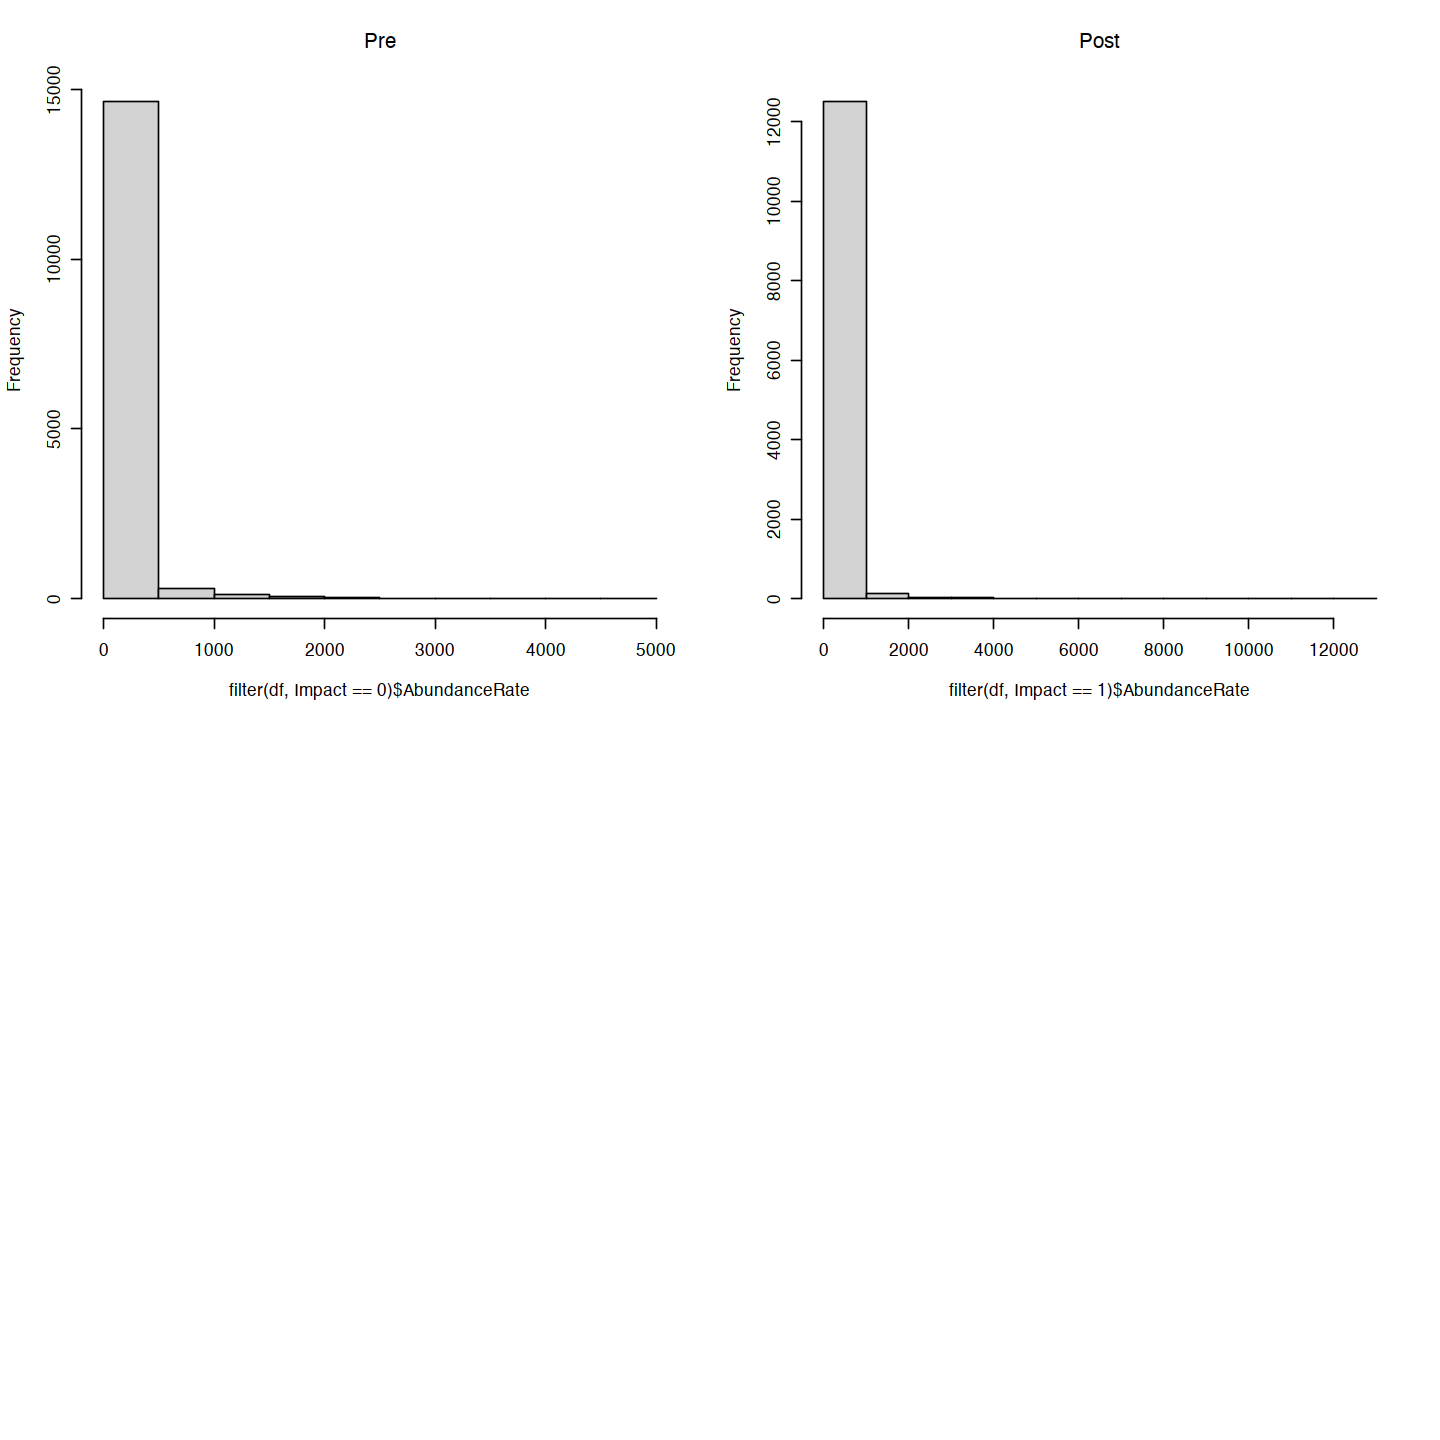

In [23]:
par(mfrow=c(2,2))
options(repr.plot.width=12, repr.plot.height=12)
hist(filter(df, Impact==0)$AbundanceRate, main="Pre")
hist(filter(df, Impact==1)$AbundanceRate, main="Post")
range(filter(df, Impact==0)$AbundanceRate)
range(filter(df, Impact==1)$AbundanceRate)

### Q2-Q3

In [4]:
alpha = 0.02
n = nrow(filter(df, Impact==0))
quant = qt(alpha/2, df=n-1, lower.tail=F)
m = mean(filter(df, Impact==0)$AbundanceRate)
s = sd(filter(df, Impact==0)$AbundanceRate)
lower = m - quant * s/sqrt(n)
upper = m + quant * s/sqrt(n)
print(paste("lower", round(lower, 2)))
print(paste("upper", round(upper, 2)))

[1] "lower 47.43"
[1] "upper 55.69"


### Q4-Q5

In [6]:
lnorm = m - qnorm(1 - alpha/2) * sqrt(m/n)
unorm = m + qnorm(1 - alpha/2) * sqrt(m/n)

print(paste("lower", round(lnorm, 2)))
print(paste("upper", round(unorm, 2)))

[1] "lower 51.42"
[1] "upper 51.69"


### Q6-Q7

In [57]:
npost = nrow(filter(df, Impact==1))
mm = mean(filter(df, Impact==1)$AbundanceRate)
ll = mm - qnorm(1 - alpha/2) * sd(filter(df, Impact==1)$AbundanceRate)/sqrt(npost)
uu = mm + qnorm(1 - alpha/2) * sd(filter(df, Impact==1)$AbundanceRate)/sqrt(npost)
print(paste("lower", round(ll, 2)))
print(paste("upper", round(uu, 2)))

[1] "lower 66.86"
[1] "upper 83.93"


### Q8-Q9

In [16]:
set.seed(145) # set this to reproduce results
NBOOT <- 1000 # no. of bootstrap samples
alpha <- 0.02 # alpha level of confidence
# For pre-impact (Impact=0)
dfPost <- subset(df, Impact==1)
muHat <- sapply(seq(NBOOT),
function(x) mean(sample(x=dfPost$AbundanceRate,
size=nrow(dfPost),
replace=TRUE)))
CI <- quantile(muHat, c(alpha/2, 1-(alpha/2)))
round(CI, 2)

1%   99% 
67.39 84.70

In [17]:
nrow(dfPost)

[1] 12725

Warning message in par(mrow = c(2, 2)):
“"mrow" is not a graphical parameter”


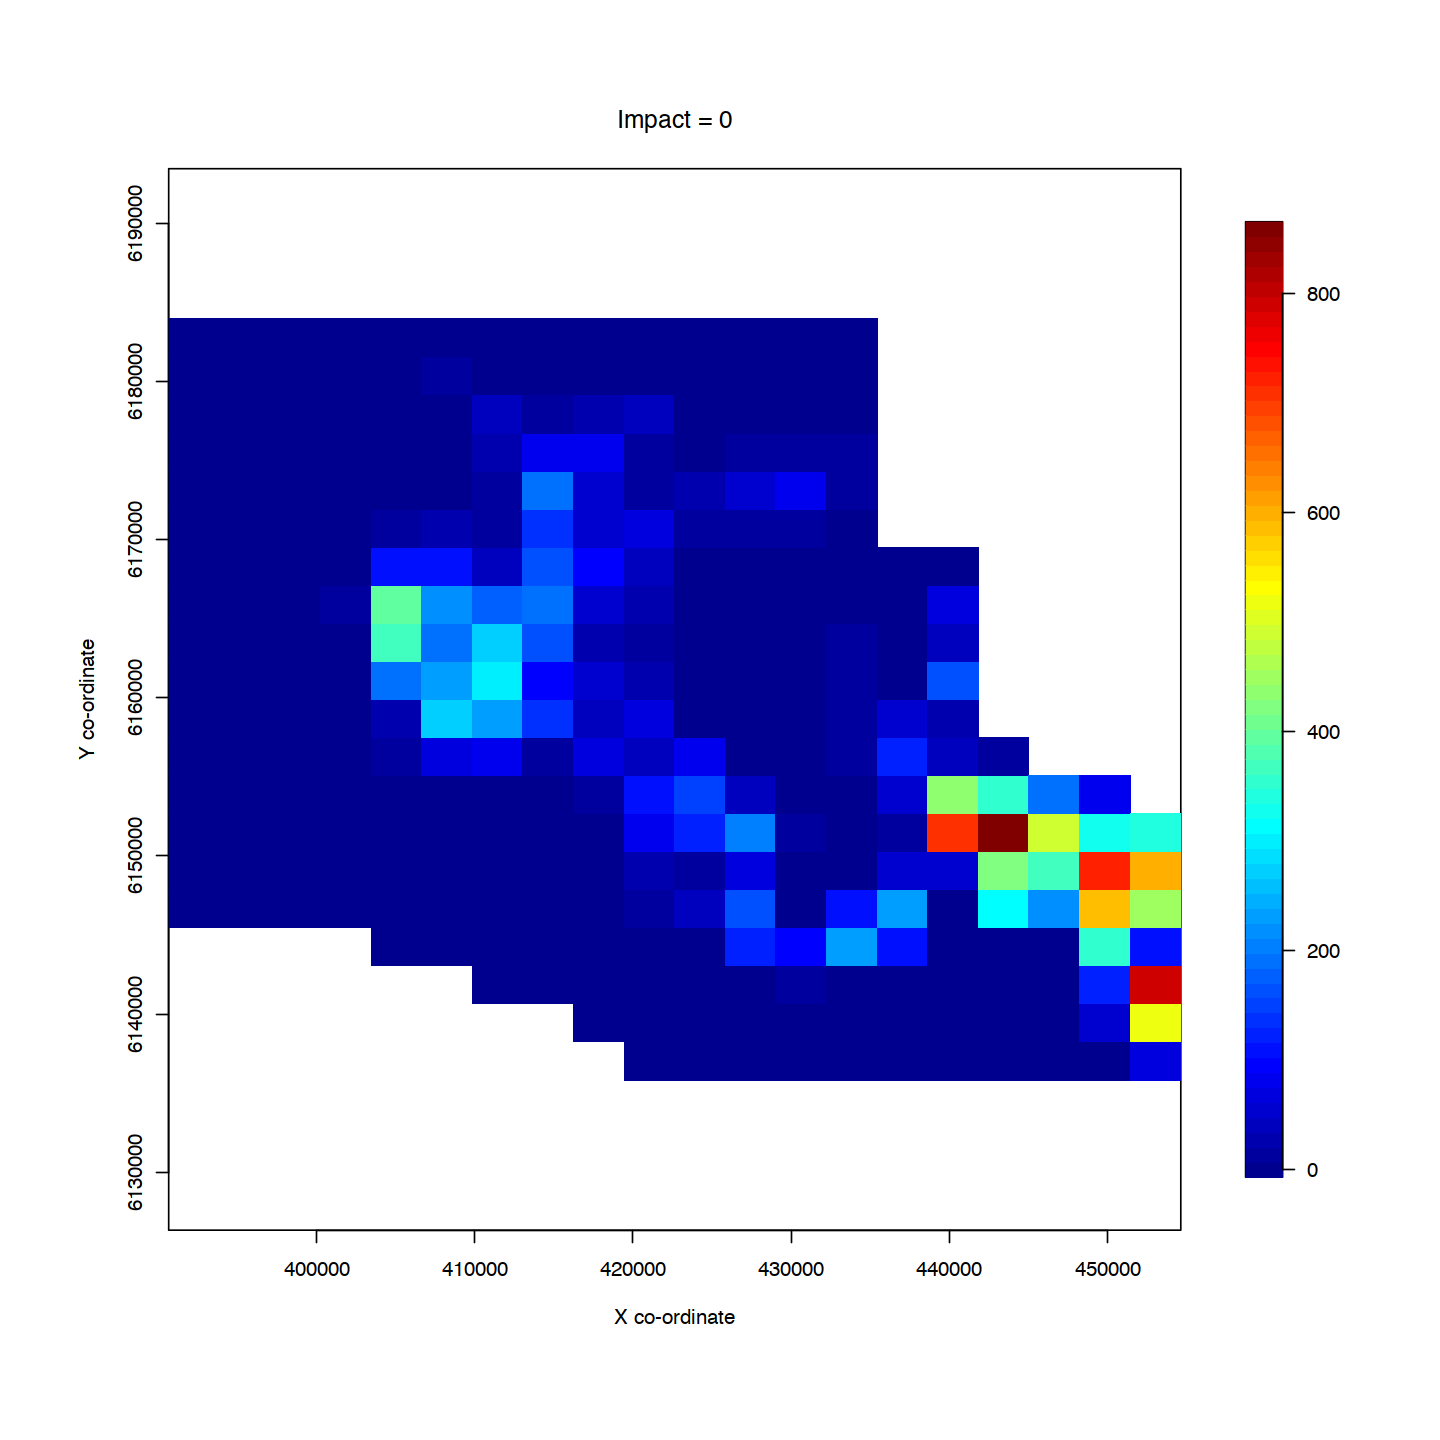

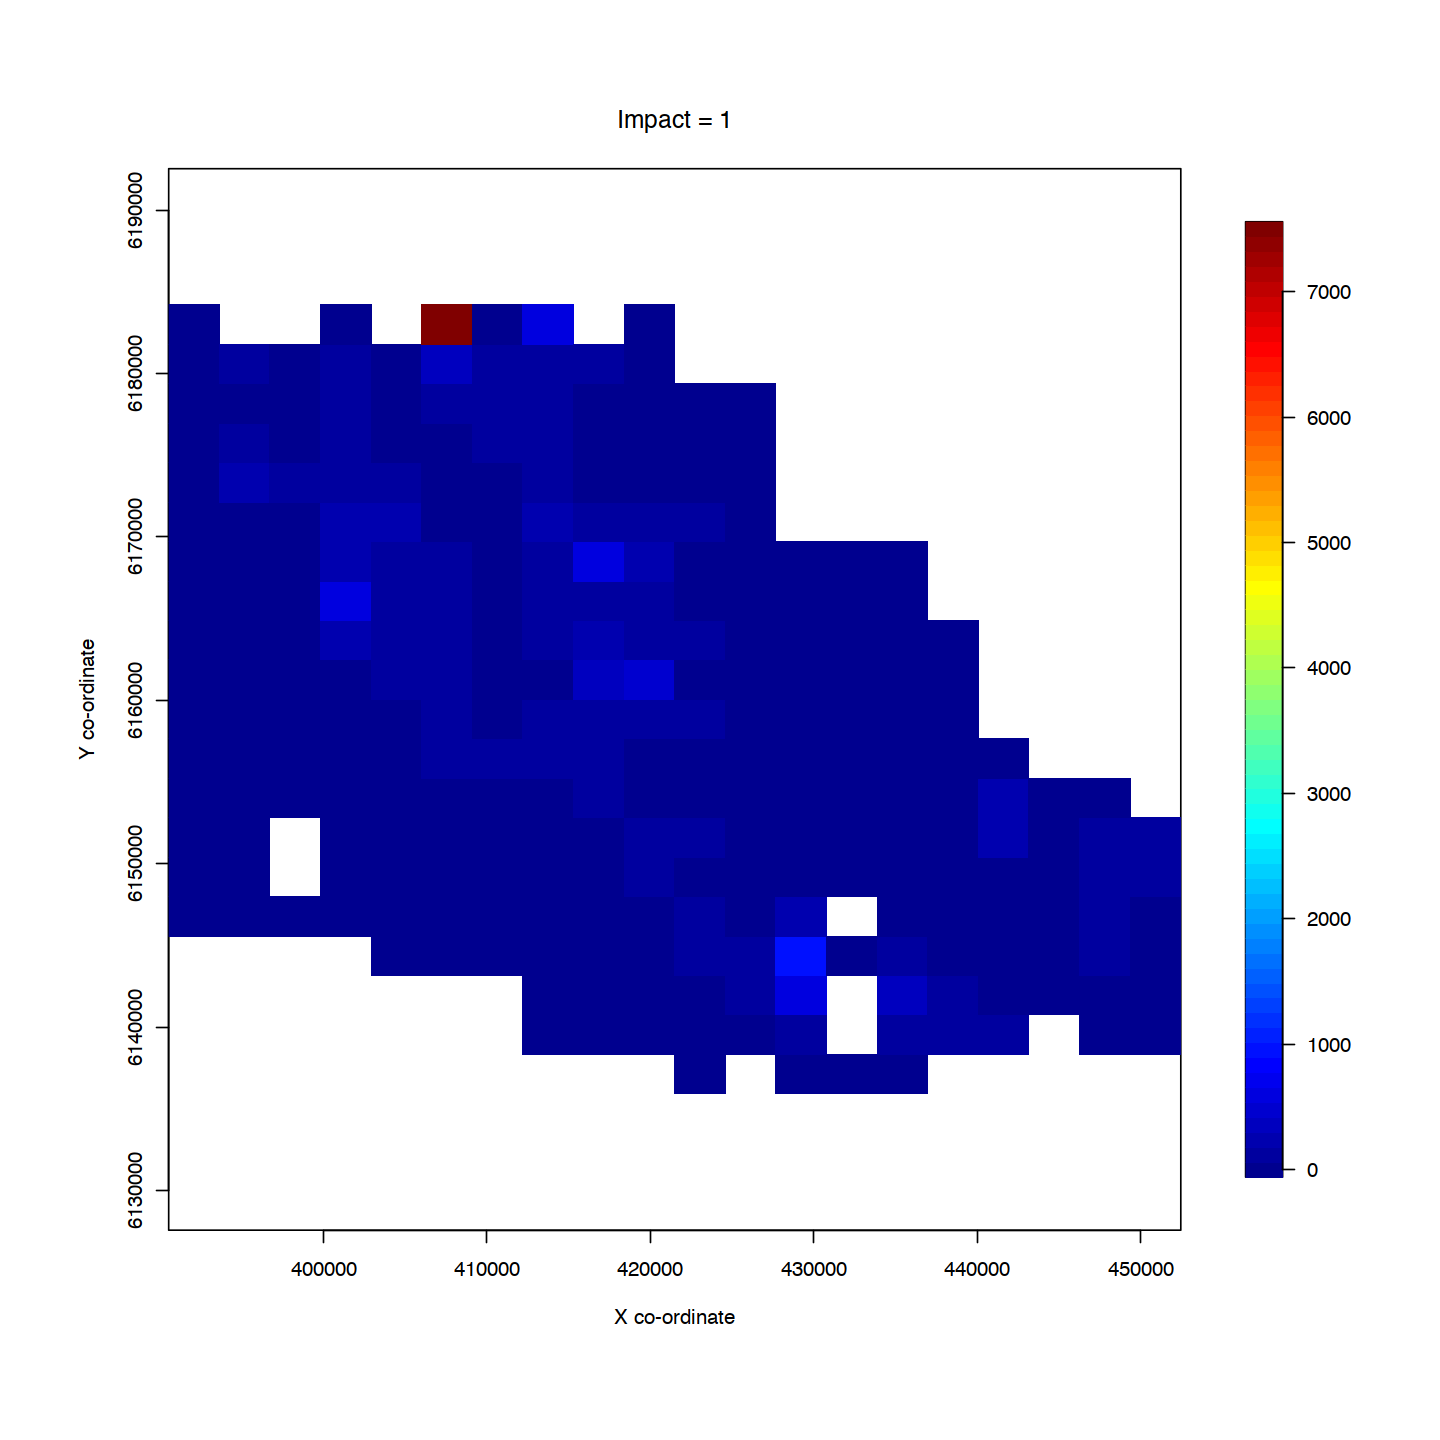

In [76]:
library(fields)
par(mrow=c(2,2))
quilt.plot(df$XPos[df$Impact==0], df$YPos[df$Impact==0], df$Nhat[df$Impact==0]/df$Area[df$Impact==0], pch=20, 
           main="Impact = 0", xlab="X co-ordinate", ylab="Y co-ordinate", 
           nrow=20, ncol=20, asp=1)
quilt.plot(df$XPos[df$Impact==1], df$YPos[df$Impact==1], df$Nhat[df$Impact==1]/df$Area[df$Impact==1], pch=20, 
           main="Impact = 1", xlab="X co-ordinate", ylab="Y co-ordinate", 
           nrow=20, ncol=20, asp=1)


Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 12364 rows containing missing values (geom_point).”
Warning message in sqrt(x):
“NaNs produced”
Warning message:
“Removed 9815 rows containing missing values (geom_point).”


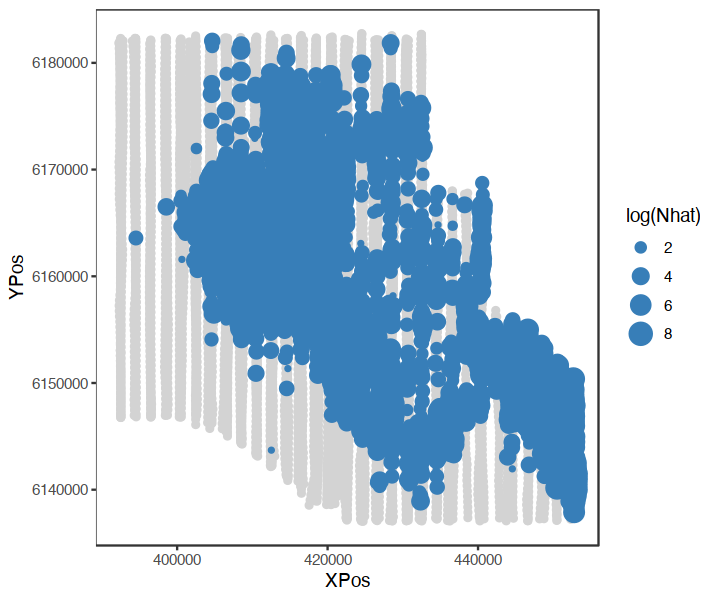

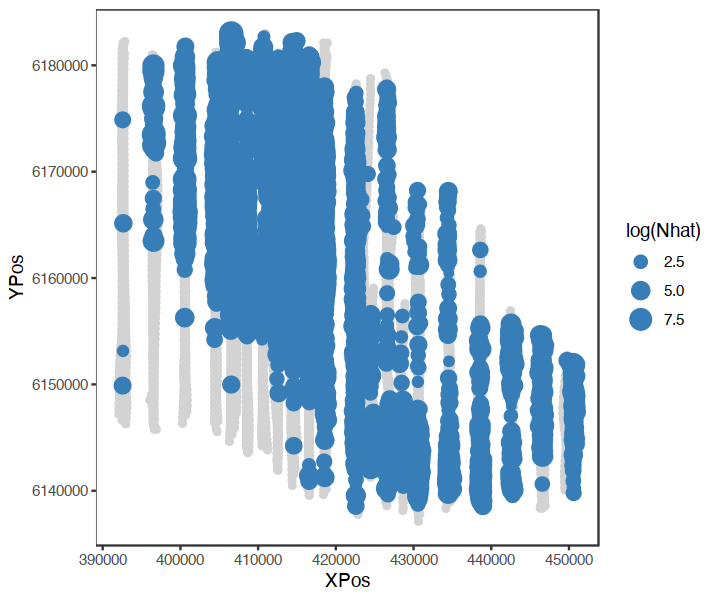

In [88]:
preimpact = filter(data, Impact == 0)
postimpact = filter(data, Impact == 1)
options(repr.plot.width=6, repr.plot.height=5)
par(mfrow=c(2,2))
ggplot() +
geom_point(aes(x=XPos, y=YPos),
colour='lightgrey', data=preimpact) +
geom_point(aes(x=XPos, y=YPos, size=log(Nhat)),
colour="#377eb8", data=preimpact) +
theme_bw() +
theme(panel.grid.major=element_blank(),
panel.grid.minor=element_blank())

ggplot() +
geom_point(aes(x=XPos, y=YPos),
colour='lightgrey', data=postimpact) +
geom_point(aes(x=XPos, y=YPos, size=log(Nhat)),
colour="#377eb8", data=postimpact) +
theme_bw() +
theme(panel.grid.major=element_blank(),
panel.grid.minor=element_blank())

### Model fitting

In [8]:
m1 = glm(Nhat ~ Impact, data=df, family=poisson, offset=Area)
m1qp = glm(Nhat ~ Impact, data=df, family=quasipoisson, offset=Area)

m2 = glm(Nhat ~ Impact + Depth + XPos + YPos, data=df, family=poisson, offset=Area)
m2qp = glm(Nhat ~ Impact + Depth + XPos + YPos, data=df, family=quasipoisson, offset=Area)

m3 = glm(Nhat ~ Impact + Depth + XPos + YPos + Impact * XPos + Impact * YPos, data=df, family=poisson, offset=Area)
m3qp = glm(Nhat ~ Impact + Depth + XPos + YPos + Impact * XPos + Impact * YPos, data=df, family=quasipoisson, offset=Area)

In [10]:
library(car)
summary(m1qp)
print(Anova(m1qp))


Call:
glm(formula = Nhat ~ Impact, family = quasipoisson, data = df, 
    offset = Area)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-11.943  -11.943   -9.949   -9.949  296.588  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.94571    0.04389   67.11  < 2e-16 ***
Impact1      0.36535    0.05931    6.16 7.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1435.851)

    Null deviance: 8610216  on 27853  degrees of freedom
Residual deviance: 8555404  on 27852  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 8


Analysis of Deviance Table (Type II tests)

Response: Nhat
       LR Chisq Df Pr(>Chisq)    
Impact   38.174  1  6.472e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [91]:
summary(m1qp)


Call:
glm(formula = Nhat ~ Impact, family = quasipoisson, data = df, 
    offset = Area)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-11.943  -11.943   -9.949   -9.949  296.588  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.94571    0.04389   67.11  < 2e-16 ***
Impact1      0.36535    0.05931    6.16 7.38e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1435.851)

    Null deviance: 8610216  on 27853  degrees of freedom
Residual deviance: 8555404  on 27852  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 8


In [11]:
print(Anova(m2qp))
print(Anova(m2))

Analysis of Deviance Table (Type II tests)

Response: Nhat
       LR Chisq Df Pr(>Chisq)    
Impact    34.13  1  5.148e-09 ***
Depth    371.34  1  < 2.2e-16 ***
XPos       4.60  1    0.03203 *  
YPos       1.48  1    0.22391    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Deviance Table (Type II tests)

Response: Nhat
       LR Chisq Df Pr(>Chisq)    
Impact    45767  1  < 2.2e-16 ***
Depth    497919  1  < 2.2e-16 ***
XPos       6164  1  < 2.2e-16 ***
YPos       1983  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
summary(m2qp)


Call:
glm(formula = Nhat ~ Impact + Depth + XPos + YPos, family = quasipoisson, 
    data = df, offset = Area)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-23.246  -11.204   -8.484   -5.833  280.082  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.694e+01  2.023e+01  -0.837   0.4024    
Impact1      3.342e-01  5.738e-02   5.825 5.77e-09 ***
Depth       -1.069e-01  5.599e-03 -19.088  < 2e-16 ***
XPos        -5.974e-06  2.791e-06  -2.140   0.0323 *  
YPos         3.894e-06  3.198e-06   1.218   0.2233    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 1340.873)

    Null deviance: 8610216  on 27853  degrees of freedom
Residual deviance: 7903279  on 27849  degrees of freedom
AIC: NA

Number of Fisher Scoring iterations: 8


In [15]:
print(Anova(m3qp))
print(Anova(m3))

Analysis of Deviance Table (Type II tests)

Response: Nhat
            LR Chisq Df Pr(>Chisq)    
Impact         35.48  1  2.578e-09 ***
Depth         393.93  1  < 2.2e-16 ***
XPos            3.53  1    0.06025 .  
YPos            0.81  1    0.36702    
Impact:XPos    52.14  1  5.156e-13 ***
Impact:YPos     4.68  1    0.03043 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
Analysis of Deviance Table (Type II tests)

Response: Nhat
            LR Chisq Df Pr(>Chisq)    
Impact         45767  1  < 2.2e-16 ***
Depth         508170  1  < 2.2e-16 ***
XPos            4554  1  < 2.2e-16 ***
YPos            1050  1  < 2.2e-16 ***
Impact:XPos    67266  1  < 2.2e-16 ***
Impact:YPos     6043  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [19]:
m3upd = glm(Nhat ~ Impact + Depth + XPos + Impact * XPos, data=df, family=quasipoisson, offset=Area)
m3upd
#m3qp = glm(Nhat ~ Impact + Depth + XPos + YPos + Impact * XPos + Impact * YPos, data=df, family=quasipoisson, offset=Area)


Call:  glm(formula = Nhat ~ Impact + Depth + XPos + Impact * XPos, family = quasipoisson, 
    data = df, offset = Area)

Coefficients:
 (Intercept)       Impact1         Depth          XPos  Impact1:XPos  
  -1.722e+00     1.750e+01    -1.084e-01     1.478e-05    -4.072e-05  

Degrees of Freedom: 27853 Total (i.e. Null);  27849 Residual
Null Deviance:	    8610000 
Residual Deviance: 7788000 	AIC: NA